In [75]:

##########################################################
#  Python script template for Question 1 (IAML Level 10)
#  Note that
#  - You should not change the filename of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
#  - You should define the functions shown below in your code.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define helper functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission
##########################################################

#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.insert(0, os.path.abspath('../helpers'))
from iaml01cw2_helpers import *

# Load the data:
dataPath = os.path.join(os.getcwd(),'../data')
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(dataPath)
Xtrn_orig = Xtrn.copy
Xtst_orig = Xtst.copy
Xtrn = Xtrn/255.0
Xtst = Xtst/255.0

Xmean = Xtrn.mean(0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean
#<----

# Q1.1
def iaml01cw2_q1_1():
    
    #Print elements of first training sample
    print("First 4 elements of the first training sample in Xtrn_nm:")
    print(Xtrn_nm[0,0:4])
    
    #Print elements of last training sample
    print("\nFirst 4 elements of the last training sample in Xtrn_nm:")
    print(Xtrn_nm[-1,0:4])
    
#
# iaml01cw2_q1_1()   # comment this out when you run the function

# Q1.2
def iaml01cw2_q1_2():
    
    print("Starting Q1.2...\n")
    
    # Array of classes
    classes = np.unique(Ytrn)
    
    # Initialisation of variables
    classSamples = []
    means = []
    closest = []
    furthest = []
    classMeans = np.zeros((10,784))
    
    # Initialise empty nested arrays
    for c in classes:
        classSamples.append([])
        closest.append([])
        furthest.append([])
    
    # Add all the indexes of samples for a given classs in the classSamples list
    for row in range(Ytrn.size): 
        classSamples[Ytrn[row]].append(row)
    
    # Iterates over all classes (to calculate means, closest and furthest samples)
    for c in range(10):
        #Represents the relevant samples for the given class c
        samples = classSamples[c]
        
        #Calculate the mean samples for each class
        for index in samples:
            classMeans[c] += Xtrn[index,:]
            
        classMeans[c] = classMeans[c]/len(samples)
        meanC = classMeans[c].reshape(28,28)
        means.append(meanC)
        
        #Calculate closest samples variables
        close1 = -1
        closeDist1 = 10000
        close2 = -1
        closeDist2 = 10000
        #Calculate furthest samples variables
        far1 = -1
        farDist1 = 0
        far2 = -1
        farDist2 = 0
        
        #Iterate through the samples of the given class to find the closest & furthest samples
        for index in samples:
            dist = sum((classMeans[c]-Xtrn[index,:])**2)
            
            if dist < closeDist1:
                close1 = index
                closeDist1 = dist
            elif dist < closeDist2:
                close2 = index
                closeDist2 = dist
                
            if dist > farDist1:
                far1 = index
                farDist1 = dist
            elif dist > farDist2:
                far2 = index
                farDist2 = dist
        
        #Store the closest and furthest samples
        closest[c].append(close1)
        closest[c].append(close2)
        furthest[c].append(far1)
        furthest[c].append(far2)
    
    #Create a subplot to show the relevant samples
    fig, axs = plt.subplots(10,5,figsize=(16,16))
    fig.tight_layout()
    for i in range(10):
        #Mean
        axs[i,0].imshow(means[i], cmap="gray_r")
        axs[i,0].set_ylabel("Class " + str(i) + "\n",fontsize=21)
        axs[i,0].set_xticklabels([])
        axs[i,0].set_yticklabels([])
        
        for n in range(1,3):
            #Closest
            axs[i,n].imshow(Xtrn[closest[i][n-1],:].reshape(28,28), cmap="gray_r")
            axs[i,n].set_title("Sample " + str(closest[i][n-1]),fontsize=18)
            axs[i,n].set_xticklabels([])
            axs[i,n].set_yticklabels([])
            
            #Furthest
            axs[i,n+2].imshow(Xtrn[furthest[i][-n+2],:].reshape(28,28), cmap="gray_r")
            axs[i,n+2].set_title("Sample " + str(furthest[i][-n+2]),fontsize=18)
            axs[i,n+2].set_xticklabels([])
            axs[i,n+2].set_yticklabels([])
    
    #Add appropriate axis labels to the subplot
    axs[9,0].set_xlabel("\nMean",fontsize=20)
    axs[9,1].set_xlabel("\nClosest sample\nto mean",fontsize=20)
    axs[9,2].set_xlabel("\n2nd closest sample\nto mean",fontsize=20)
    axs[9,3].set_xlabel("\n2nd furthest sample\nfrom mean",fontsize=20)
    axs[9,4].set_xlabel("\nFurthest sample\nfrom mean",fontsize=20)      
                
#
# iaml01cw2_q1_2()   # comment this out when you run the function

# Q1.3
def iaml01cw2_q1_3():
    from sklearn.decomposition import PCA
    
    print("Starting Q1.3...\n")
    
    #Apply PCA to our normalized training data
    pca = PCA().fit(Xtrn_nm)
    
    #Print the explained variance for the first 5 PCs
    print("The explained variances for the first 5 principal components:")
    
    for i in range(5):
        print("PC " + str(i+1) + " = " + str(pca.explained_variance_[i]))
    
    
#
# iaml01cw2_q1_3()   # comment this out when you run the function


# Q1.4
def iaml01cw2_q1_4():
    from sklearn.decomposition import PCA
    
    #Set the quality of the plt's figure output
    plt.rcParams["figure.figsize"] = (10,10)
    
    print("Starting Q1.4...\n")
    
    #Initialize arrays to store number of attributes and cumVar
    y = np.empty(784)
    x = np.arange(1,785)
    
    #Iterate through all different possible number of PCA components
    for n in range(784):
        pca = PCA(n_components=n+1).fit(Xtrn_nm)
        y[n] = pca.explained_variance_ratio_.sum()
    
    #Plot the data appropriately
    plt.plot(x,y)
    plt.grid(True)
    plt.xlabel("K",fontsize=16)
    plt.ylabel("Cumulative explained variance ratio",fontsize=16)
    plt.title("A graph to show the relationship between the cumulative explained variance\nratio and the number of principal components (K) for 'Xtrn_nm'",fontsize=18)

#
# iaml01cw2_q1_4()   # comment this out when you run the function


# Q1.5
def iaml01cw2_q1_5():
    from sklearn.decomposition import PCA
    
    print("Starting Q1.5...\n")
    
    #Initialize PCA model
    pca = PCA().fit(Xtrn_nm)
    
    #Plot the first 10 principal components in a 2-by-5 grid
    fig, axs = plt.subplots(2,5,figsize=(12,7))
    index = 0
    for r in range(2):
        for c in range(5):
            axs[r,c].imshow(pca.components_[index].reshape(28,28))
            axs[r,c].set_title("PC " + str(index+1),fontsize=18)
            axs[r,c].set_xticklabels([])
            axs[r,c].set_yticklabels([])
            index += 1

#
# iaml01cw2_q1_5()   # comment this out when you run the function


# Q1.6
def iaml01cw2_q1_6():
    from sklearn.decomposition import PCA
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    
    print("Starting Q1.6...\n")
    
    #Set up arrays to store relevant data
    classes = np.unique(Ytrn)
    K = [5,20,50,200]
    orig_classSamples = np.empty((10,784))
    
    # Get indexes of the first samples for each class
    for c in classes:
        for s in range(Ytrn.size):
            if Ytrn[s] == c:
                orig_classSamples[c,:] = Xtrn_nm[s,:]
                break
    
    #Numpy matrix to store all the RMSE scores
    rmse = np.empty((10,4))
    
    #Iterate through the different values of K
    for i in range(4):
        
        #Initialize PCA model
        pca = PCA(n_components=K[i]).fit(Xtrn_nm)
        
        #Iterate through the different classes
        for s in range(10):
            
            #Original X vector
            X = orig_classSamples[s,:]
            
            #Transformed X vector
            newX = pca.transform(X.reshape(1,-1))
            
            #Reconstructed X vector
            inverseX = pca.inverse_transform(newX.reshape(-1))
            
            #Output RMSE to rmse numpy matrix
            rmse[s,i] = sqrt(mean_squared_error(X,inverseX))
    
    #Print the rounded RMSE matrix
    print(np.round(rmse,3))
            
            
#
# iaml01cw2_q1_6()   # comment this out when you run the function


# Q1.7
def iaml01cw2_q1_7():
    from sklearn.decomposition import PCA
    
    #Set the quality of the plt's figure output
    plt.rcParams["figure.figsize"] = (7,5)
    
    print("Starting Q1.7...\n")
    
    #Set up arrays to store relevant data
    classes = np.unique(Ytrn)
    K = [5,20,50,200]
    orig_classSamples = np.empty((10,784))
    
    # Get the first samples for each class
    for c in classes:
        for s in range(Ytrn.size):
            if Ytrn[s] == c:
                orig_classSamples[c,:] = Xtrn_nm[s,:]
                break
    
    #Variables to store the inversely transformed samples
    index1 = 0
    new_classSamples = np.empty((40,784))
    
    #Iterate through the different values of K
    for i in range(4):
        
        #Initialize PCA model
        pca = PCA(n_components=K[i]).fit(Xtrn_nm)
        
        #Iterate through the different classes
        for s in range(10):
            
            #Original X vector
            X = orig_classSamples[s,:]
            
            #Transformed X vector
            newX = pca.transform(X.reshape(1,-1))
            
            #Reconstructed X vector
            inverseX = pca.inverse_transform(newX.reshape(-1))
            
            #Store the reconstructed X vector
            new_classSamples[index1,:] = inverseX + Xmean
            index1 += 1
    
    #Put all of these images into a subplot
    fig, axs = plt.subplots(10,4,figsize=(18,18))
    index = 0
    for k in range(4):
        for c in range(10):
            #Plot the class labels on the y axis
            if k == 0:
                axs[c,k].set_ylabel("Class " + str(c),fontsize=20)
            
            #Plot the image and set the tick labels
            axs[c,k].imshow(new_classSamples[index,:].reshape(28,28))
            axs[c,k].set_xticklabels([])
            axs[c,k].set_yticklabels([])
            index += 1
    
    #Plot the K labels on the x axis
    axs[9,0].set_xlabel("K = 5",fontsize=20)
    axs[9,1].set_xlabel("K = 20",fontsize=20)
    axs[9,2].set_xlabel("K = 50",fontsize=20)
    axs[9,3].set_xlabel("K = 200",fontsize=20)
    #plt.suptitle("A grid to show the images of the reconstructed class samples\nfor varying amounts of dimension reductions (K)", fontsize=24)
    
    plt.show()
    
#
# iaml01cw2_q1_7()   # comment this out when you run the function


# Q1.8
def iaml01cw2_q1_8():
    from sklearn.decomposition import PCA
    
    #Set the quality of the plt's figure output
    plt.rcParams["figure.figsize"] = (10,10)
    
    print("Starting Q1.8...\n")
    
    #Set up PCA model
    pca = PCA(n_components=2).fit(Xtrn_nm)
    
    #Get 2D version of Xtrn_nm
    newXtrn = pca.transform(Xtrn_nm)
    
    #Initialize plot variables
    x = newXtrn[:,0]
    y = newXtrn[:,1]
    
    #Plot scatter
    sc = plt.scatter(x,y,s=16,c=Ytrn,cmap="coolwarm",alpha =0.9)
    
    #Implement a colorbar
    cbar = plt.colorbar(sc)
    cbar.set_label("\nClass number", fontsize=15)
    
    #Plot features for further readability
    plt.grid(True)
    plt.xlabel("PC1",fontsize=16)
    plt.ylabel("PC2",fontsize=16)
    plt.title("A 2D-PCA plane to show the relationship between\nthe different classes in our dataset 'Xtrn_nm'",fontsize=18)

#
# iaml01cw2_q1_8()   # comment this out when you run the function


Starting Q1.8...



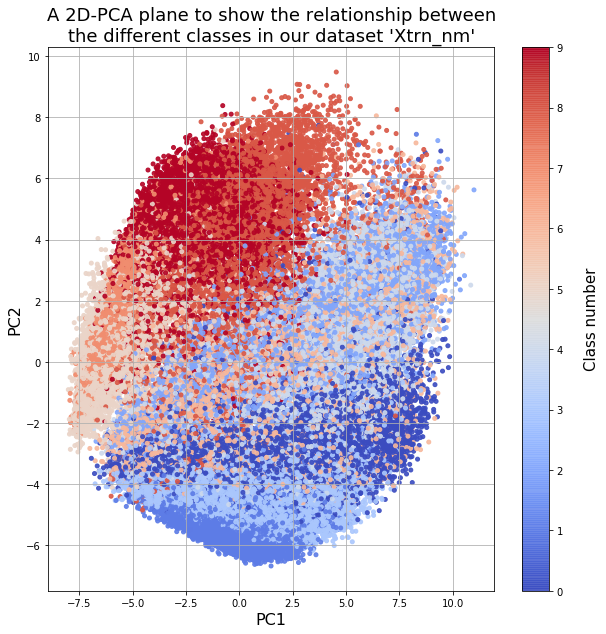

In [76]:
iaml01cw2_q1_8()